# <img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 04 : Linear Regression</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 1401 | DeadLine: 26th Mehr, 13:00 </font></h1>



# Step0: Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from joblib import dump, load

# Step1: Read Data

In [6]:
real_estate_df = pd.read_csv('Real estate.csv')

In [7]:
real_estate_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


* **This dataset has 414 subjects with 8 columns (6 features).**
* **The value types of this dataset are float(6), integer(2).**
* **There isn't any null value in this dataset.**

In [66]:
real_estate_df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

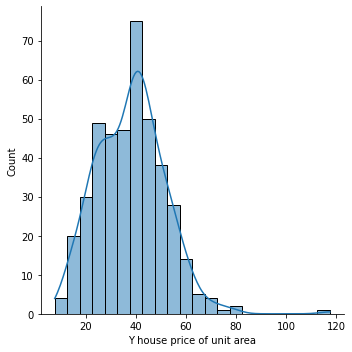

In [143]:
sns.displot(data= real_estate_df, x='Y house price of unit area', kde=True)

In [95]:
#skewness in the data
print('The skewness of house price of unit area column is {}, Therefore, its distribution is almost normal.'
         .format(np.round(real_estate_df['Y house price of unit area'].skew(), 3)))

The skewness of house price of unit area column is 0.6, Therefore, its distribution is almost normal.


# Step2: Data Visualization
<hr>
pairplot

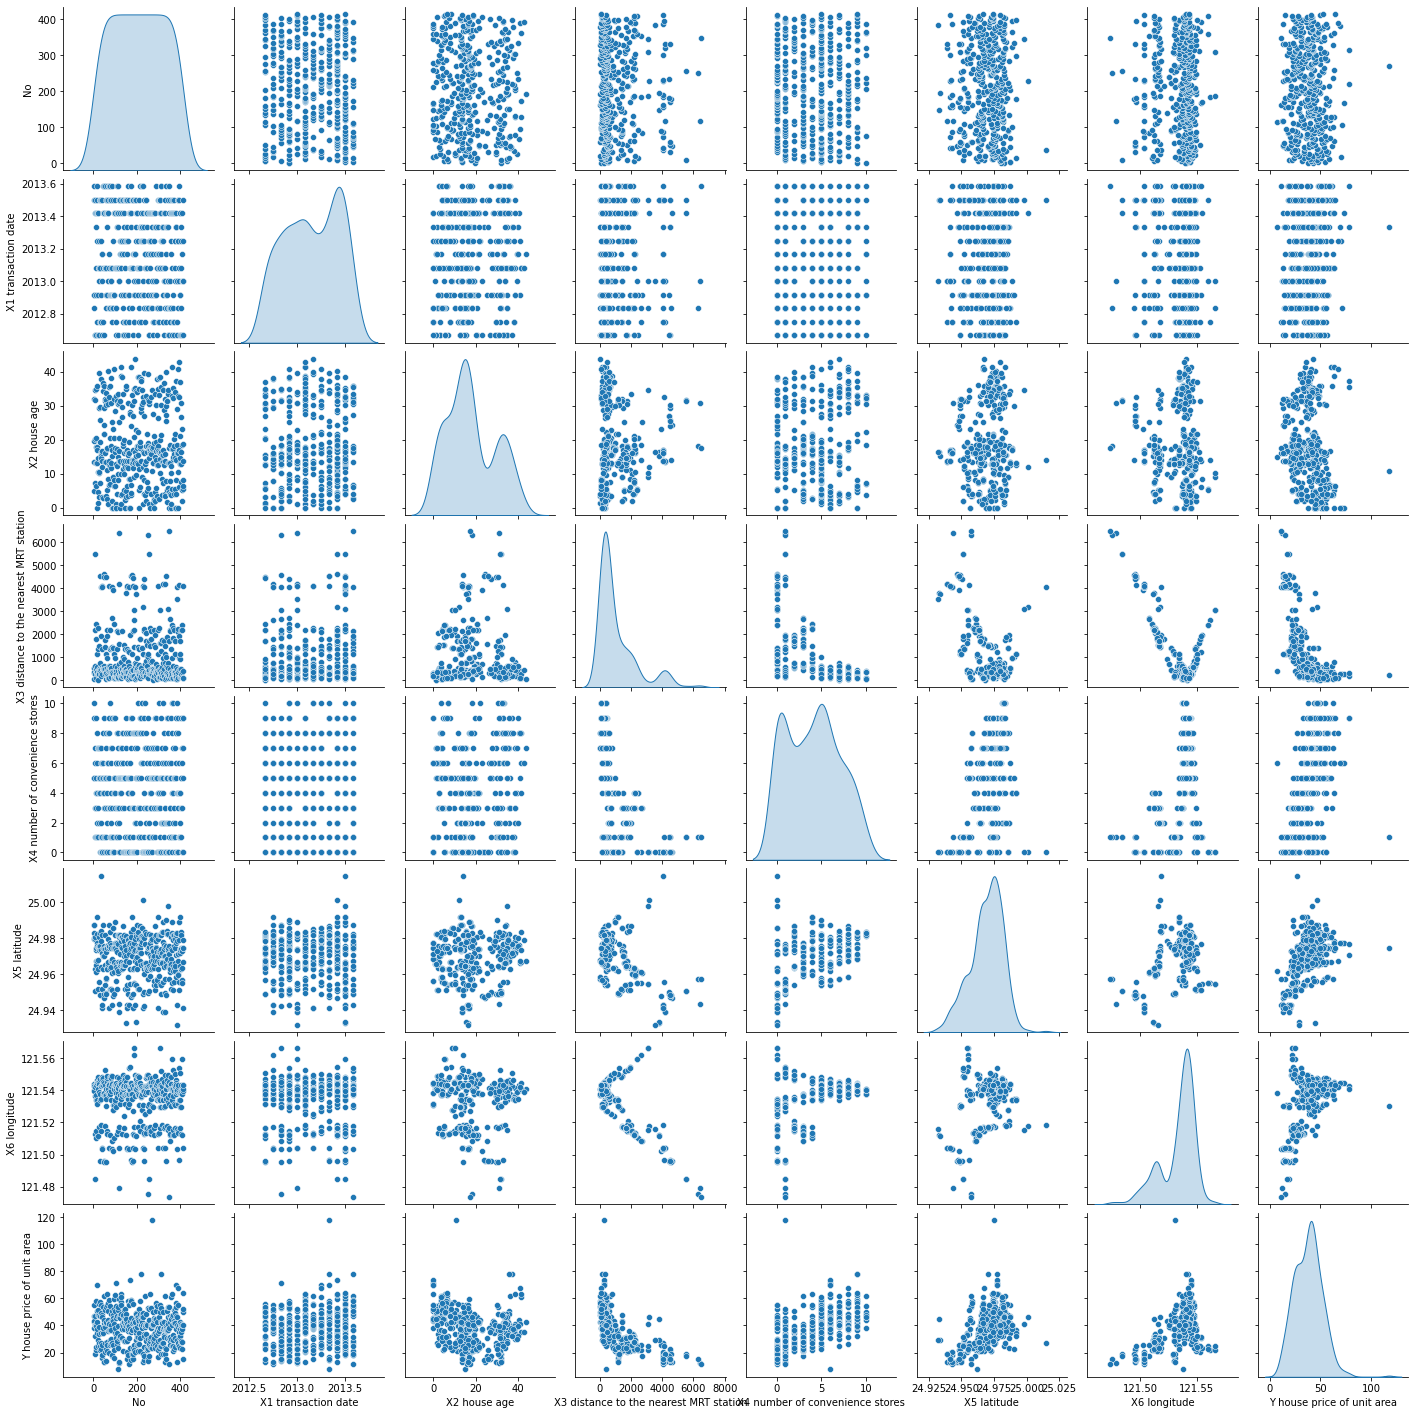

In [144]:
sns.pairplot(real_estate_df, diag_kind = 'kde')

### transaction date:

<AxesSubplot:xlabel='X1 transaction date', ylabel='Y house price of unit area'>

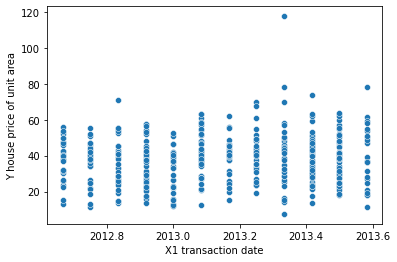

In [206]:
sns.scatterplot(data=real_estate_df, x='X1 transaction date', y='Y house price of unit area')

* plot 1 shows that the house price rises to above 60/m2 after early 2013; while roughly before the first month of 2013, the house price has been below 60, with only one outlier in august 2012. 

In [203]:
pd.DataFrame(real_estate_df.groupby('X1 transaction date').count()['No'])

,No
X1 transaction date,
2012.667,30
2012.750,27
2012.833,31
2012.917,38
2013.000,28
2013.083,46
2013.167,25
2013.250,32
2013.333,29


* 12 data points correspond to 12 months.

### house age:

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

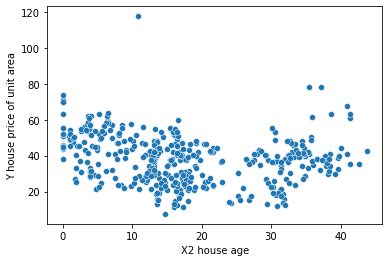

In [207]:
sns.scatterplot(data=real_estate_df, x='X2 house age', y='Y house price of unit area')

In [196]:
real_estate_df['X2 house age'].min()

0.0

In [197]:
real_estate_df['X2 house age'].max()

43.8

* plot 2 shows the relationship between house price and house age. the house ranges from newly built (0 years) to an age of up to nearly 44 years old. however, the house price across the 12-month timespan does not show an obvious trend. this may imply that the house age is not so relevant to the house price.

### distance to the nearest MRT station:

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

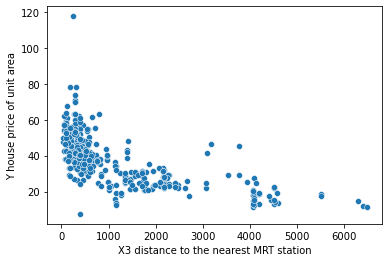

In [208]:
sns.scatterplot(data=real_estate_df, x='X3 distance to the nearest MRT station', y='Y house price of unit area')

* plot 3 shows a clear decreasing trend between the house price and the distance to the nearest mrt station. houses with the highest sale price are within 1000 meters to an mrt station, and then within 2000 meters to an mrt station. so this may imply that the variable x3 (distance to mrt station) is an important predictor for the house price.

### number of convenience stores:

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

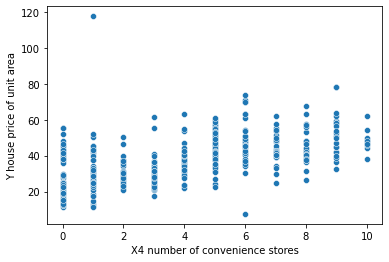

In [209]:
sns.scatterplot(data=real_estate_df, x='X4 number of convenience stores', y='Y house price of unit area')

* plot 4 shows the relationship between the house price and the number of convenience stores. there is a slowly increasing trend between these two variables. only when the number of convenience stores is less than 3, the house prices go below 20/m2. when there are more than 7 convenience stores around, most of the house prices are greater than 40/m2. when there are 10 convenient stores, the majority of the house price is around 50/m2. this again implies that variable x4 (number of convenience stores) could also be an important predictor for the house price. 

### latitude & longitude:


<AxesSubplot:xlabel='X5 latitude', ylabel='X6 longitude'>

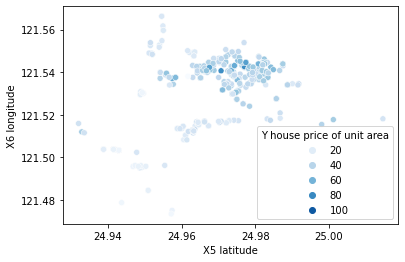

In [220]:
sns.scatterplot(data=real_estate_df, x='X5 latitude', y='X6 longitude', hue='Y house price of unit area', palette='Blues')

* plot 5 shows the relationship between the house price and the location of the house in terms of the latitude and longitude coordinates. it is clearly shown that the range of house price distributes in a circular pattern, for example, houses located in a crowd or inner circle are having higher prices, and the lower house prices are located far from the crowd, in the outer region and where only a few of houses are found there. the location can be an important predictor for the house price.

<AxesSubplot:>

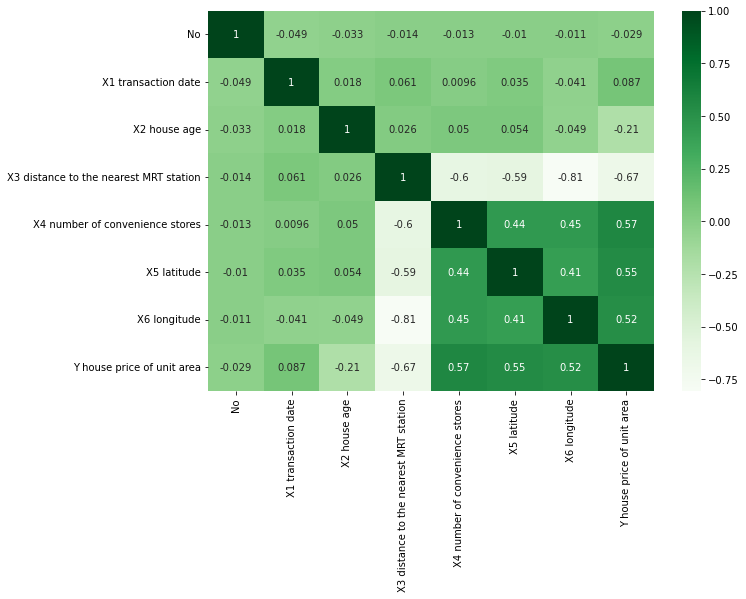

In [145]:
# correlation
fig = plt.figure(figsize=(10,7))
sns.heatmap(real_estate_df.corr(), annot=True,cmap='Greens')

<span style='color:black'> **From this heatmap, we can see that**  </span> <span style='color:darkred'> **number of convenience stores**  </span><span style='color:black'> **,**  </span> </span> <span style='color:darkred'> **latitude**  </span> <span style='color:black'> **and**  </span> <span style='color:darkred'> **longitude**  </span> <span style='color:black'> **features have more and positive relationsheep with**  </span><span style='color:darkred'> **house price of unit area** </span><span style='color:black'> **, that means the higher the**  </span> </span> <span style='color:darkred'> **number of convenience stores**  </span><span style='color:black'> **,**  </span> </span> <span style='color:darkred'> **latitude**  </span> <span style='color:black'> **and**  </span> <span style='color:darkred'> **longitude**  </span>, <span style='color:darkred'> **house price of unit area** </span> </span> <span style='color:black'> **is higher.**  </span>



<span style='color:black'> **and also, we can see that**  </span> <span style='color:darkred'> **distance to the nearest MRT station**  </span><span style='color:black'> **feature has more and negative relationsheep with**  </span><span style='color:darkred'> **house price of unit area** </span><span style='color:black'> **, that means the higher the**  </span> </span> <span style='color:darkred'> **ndistance to the nearest MRT station**  </span>, <span style='color:darkred'> **house price of unit area** </span> </span> <span style='color:black'> **is lower.**  </span>

# Step3: X, y

In [9]:
X = real_estate_df.drop(['No', 'Y house price of unit area'], axis=1)
y = real_estate_df['Y house price of unit area']

In [10]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [11]:
X.shape

(414, 6)

In [12]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [13]:
y.shape

(414,)

In [14]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

# Step4: Split Trainset and Testset (X_train, X_test, y_train, y_test)
<hr>
<b>from sklearn.model_selection import train_test_split</b>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
X_train.shape, X_test.shape

((331, 6), (83, 6))

In [17]:
y_train.shape, y_test.shape

((331,), (83,))

# Step5: Create the model
<b>linear regression</b>
<hr>
<b>from sklearn.linear_model import LinearRegression</b>

In [18]:
linear_model = LinearRegression()

# Step6: Training the model

In [19]:
linear_model.fit(X_train, y_train)

LinearRegression()

### Coefficients

In [68]:
linear_model.coef_

array([ 4.97300395e+00, -2.86733346e-01, -4.39882963e-03,  1.23218477e+00,
        2.43562821e+02,  1.51826711e+00])

In [67]:
X.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [70]:
coef_matrix = pd.DataFrame(data=linear_model.coef_, index=X.columns, columns=['Coefficient'])

In [71]:
coef_matrix

,Coefficient
X1 transaction date,4.973004
X2 house age,-0.286733
X3 distance to the nearest MRT station,-0.004399
X4 number of convenience stores,1.232185
X5 latitude,243.562821
X6 longitude,1.518267


### intercept

In [25]:
linear_model.intercept_

-16234.447509381325

Holding all other features fixed, a 1 unit increase in **number of convenience stores** is associated with an increase of $1.232185 .

# Step7: Predicting Test Data

In [26]:
y_pred = linear_model.predict(X_test)

In [27]:
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred, 'Residuals':(y_test - y_pred)})

,Y_test,Y_pred,Residuals
176,19.2,12.304507,6.895493
347,11.2,9.884906,1.315094
307,24.7,21.460539,3.239461
299,46.1,48.470683,-2.370683
391,31.3,31.851676,-0.551676
...,...,...,...
65,44.3,43.943787,0.356213
48,13.4,11.670116,1.729884
18,42.3,47.367277,-5.067277
15,50.5,38.112267,12.387733


# Step8: Evalutaing the Model
<hr>
<br>from sklearn import metrics</br>

### MAE

In [28]:
MAE = metrics.mean_absolute_error(y_test, y_pred)

### MSE

In [29]:
MSE = metrics.mean_squared_error(y_test, y_pred)

### RMSE

In [30]:
RMSE = np.sqrt(MSE)

### Creat a DataFrame
<hr>
<b>MAE, MSE, RMSE</b>

In [31]:
pd.DataFrame({'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE}, index=['Metrics'])

,MAE,MSE,RMSE
Metrics,5.195031,44.129008,6.642967


In [32]:
#Compare the metrics to the mean of target variable
real_estate_df['Y house price of unit area'].mean()

37.98019323671498

# Step9: Residuals

In [33]:
test_residuals = y_test - y_pred

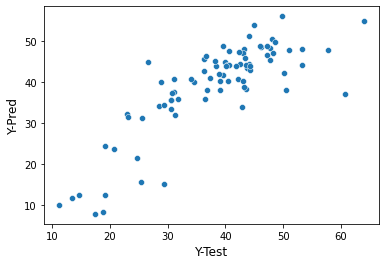

In [34]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test', fontsize=12)
plt.ylabel('Y-Pred', fontsize=12)
plt.show()

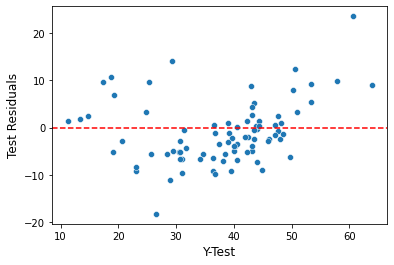

In [35]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')
plt.xlabel('Y-Test', fontsize=12)
plt.ylabel('Test Residuals', fontsize=12)
plt.show()

Random

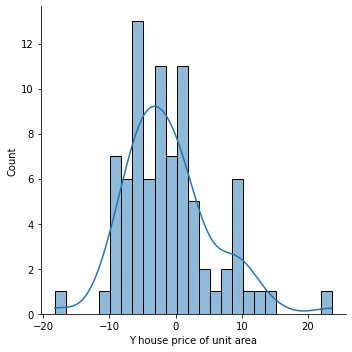

In [36]:
sns.displot(test_residuals, bins=25, kde=True)

# Step10: Saving and Loading the Model

In [37]:
# from joblib import dump, load

# Save the model
final_model = LinearRegression()
final_model.fit(X, y)
dump(final_model, 'Real estate.joblib')

['Real estate.joblib']

In [38]:
# Load the Model
load_model = load('Real estate.joblib')

In [39]:
X.iloc[10]

X1 transaction date                       2013.08300
X2 house age                                34.80000
X3 distance to the nearest MRT station     405.21340
X4 number of convenience stores              1.00000
X5 latitude                                 24.97349
X6 longitude                               121.53372
Name: 10, dtype: float64

In [40]:
y[10]

41.4

In [41]:
# test: X1=2013.083, X2=34.80000, X3=405.21340, X4=1.00000, X5=24.97349, X6=121.53372
test = [[2013.083, 34.8, 405.21340, 1, 24.97349, 121.53372]]

In [42]:
load_model.predict(test)

C:\Users\Marzie_Thr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33.57234765])

# Extra Points

## Gradient Descent

# Step11: Scale Data

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
X_test_scaled = scaler.transform(X_test)

# Step12: Plot J(w,b), Iterations

In [46]:
X_train_scaled.shape

(331, 6)

In [47]:
np.ones(X.shape[1]).shape

(6,)

In [72]:
# feed_forward

def feed_forward(X, y, W, b):

    # Number of rows
    m = X.shape[0]
    # Output
    y_pred = np.dot(X, W) + b
    # Error
    error = y_pred - y
    # Cost Function
    cost_function = 1/ (2 * m) * np.sum(error ** 2)
    
    return y_pred, cost_function, error


* **error =** y - f_wb
* **d(cost_function) / dW =** d(cost_function) / d(error) * d(error) / d(f_wb) * d(f_wb) / d(W)
* **d(cost_function) / db =** d(cost_function) / d(error) * d(error) / d(f_wb) * d(f_wb) / d(b)

* **d(cost_function) / d(error) =** (1/m) * np.sum(error)
* **d(error) / d(f_wb) =** 1
* **d(f_wb) / d(W) =** X.T

* **d(f_wb) / d(b) =** 1

* **d(cost_function) / dW =** (1/m) * np.sum(error) * 1 * X.T = (1/m) * np.dot(X.T, error)
* **d(cost_function) / db =** (1/m) * np.sum(error) * 1 * 1 = (1/m) * np.sum(error)

In [73]:
def back_propagation(X, error):
    m = X.shape[0]
    dcost_dw = (1/m) * np.dot(X.T, error)
    dcost_db = (1/m) * np.sum(error)
    
    return dcost_dw, dcost_db

In [74]:
def gradient_descent(X, y, l_rate=0.01, iters=1000):
    m = X.shape[0]
    
    W = np.random.rand(X.shape[1]) 
    b = np.random.rand(1) 
#     W = np.ones(X.shape[1])
#     b = 0
    
    cost_function_list = [0.01]
    
    for i in range(iters):
        
        # Feed Forward
        y_pred, cost_function, error = feed_forward(X, y, W, b)
        cost_function_list.append(cost_function)
        print('iter: ', i, '\nCost Function: ', cost_function)

        
        if (np.sqrt(cost_function_list[i + 1]) - np.sqrt(cost_function_list[i])) == 0:
            break
        
        # Back Propagation
        dcost_dw, dcost_db = back_propagation(X, error)

    
        # Update
        W = W - l_rate * dcost_dw
        b = b - l_rate * dcost_db
        
    return W, b, cost_function_list


In [75]:
W, b, cost_function = gradient_descent(X_train_scaled, y_train, l_rate=0.1, iters=10000)

iter:  0 
Cost Function:  811.3102341294508
iter:  1 
Cost Function:  652.2106089799581
iter:  2 
Cost Function:  529.5308912637831
iter:  3 
Cost Function:  433.481692879416
iter:  4 
Cost Function:  357.46093625707874
iter:  5 
Cost Function:  296.8345177370156
iter:  6 
Cost Function:  248.23242029704255
iter:  7 
Cost Function:  209.1311338714244
iter:  8 
Cost Function:  177.5974429610855
iter:  9 
Cost Function:  152.12499557941925
iter:  10 
Cost Function:  131.5256344201544
iter:  11 
Cost Function:  114.85412256823462
iter:  12 
Cost Function:  101.35402470671731
iter:  13 
Cost Function:  90.4175553739096
iter:  14 
Cost Function:  81.5550368021032
iter:  15 
Cost Function:  74.37122452763674
iter:  16 
Cost Function:  68.54670342897882
iter:  17 
Cost Function:  63.8231260495943
iter:  18 
Cost Function:  59.99142083400977
iter:  19 
Cost Function:  56.88232947703579
iter:  20 
Cost Function:  54.358789726342266
iter:  21 
Cost Function:  52.30979090003158
iter:  22 
Cost Fu

iter:  213 
Cost Function:  42.90442861878639
iter:  214 
Cost Function:  42.90436778976528
iter:  215 
Cost Function:  42.90430879090682
iter:  216 
Cost Function:  42.90425156714687
iter:  217 
Cost Function:  42.904196065078075
iter:  218 
Cost Function:  42.90414223289989
iter:  219 
Cost Function:  42.904090020370326
iter:  220 
Cost Function:  42.90403937875901
iter:  221 
Cost Function:  42.90399026080174
iter:  222 
Cost Function:  42.903942620656316
iter:  223 
Cost Function:  42.90389641385983
iter:  224 
Cost Function:  42.90385159728711
iter:  225 
Cost Function:  42.90380812911049
iter:  226 
Cost Function:  42.90376596876079
iter:  227 
Cost Function:  42.9037250768894
iter:  228 
Cost Function:  42.90368541533165
iter:  229 
Cost Function:  42.90364694707107
iter:  230 
Cost Function:  42.90360963620494
iter:  231 
Cost Function:  42.90357344791073
iter:  232 
Cost Function:  42.903538348413626
iter:  233 
Cost Function:  42.90350430495499
iter:  234 
Cost Function:  42.

Cost Function:  42.90240907173502
iter:  437 
Cost Function:  42.90240900482039
iter:  438 
Cost Function:  42.902408939919006
iter:  439 
Cost Function:  42.902408876970306
iter:  440 
Cost Function:  42.902408815915564
iter:  441 
Cost Function:  42.90240875669776
iter:  442 
Cost Function:  42.90240869926164
iter:  443 
Cost Function:  42.9024086435536
iter:  444 
Cost Function:  42.902408589521656
iter:  445 
Cost Function:  42.90240853711537
iter:  446 
Cost Function:  42.90240848628583
iter:  447 
Cost Function:  42.902408436985596
iter:  448 
Cost Function:  42.90240838916867
iter:  449 
Cost Function:  42.902408342790395
iter:  450 
Cost Function:  42.902408297807504
iter:  451 
Cost Function:  42.90240825417802
iter:  452 
Cost Function:  42.90240821186123
iter:  453 
Cost Function:  42.902408170817594
iter:  454 
Cost Function:  42.902408131008855
iter:  455 
Cost Function:  42.90240809239785
iter:  456 
Cost Function:  42.90240805494852
iter:  457 
Cost Function:  42.9024080

Cost Function:  42.90240685112018
iter:  649 
Cost Function:  42.90240685101717
iter:  650 
Cost Function:  42.90240685091726
iter:  651 
Cost Function:  42.90240685082036
iter:  652 
Cost Function:  42.90240685072637
iter:  653 
Cost Function:  42.90240685063522
iter:  654 
Cost Function:  42.90240685054679
iter:  655 
Cost Function:  42.90240685046104
iter:  656 
Cost Function:  42.902406850377865
iter:  657 
Cost Function:  42.90240685029718
iter:  658 
Cost Function:  42.90240685021894
iter:  659 
Cost Function:  42.90240685014305
iter:  660 
Cost Function:  42.90240685006944
iter:  661 
Cost Function:  42.90240684999804
iter:  662 
Cost Function:  42.902406849928795
iter:  663 
Cost Function:  42.902406849861634
iter:  664 
Cost Function:  42.90240684979649
iter:  665 
Cost Function:  42.90240684973331
iter:  666 
Cost Function:  42.90240684967202
iter:  667 
Cost Function:  42.902406849612596
iter:  668 
Cost Function:  42.90240684955494
iter:  669 
Cost Function:  42.90240684949

iter:  868 
Cost Function:  42.90240684770063
iter:  869 
Cost Function:  42.902406847700504
iter:  870 
Cost Function:  42.90240684770039
iter:  871 
Cost Function:  42.90240684770027
iter:  872 
Cost Function:  42.90240684770016
iter:  873 
Cost Function:  42.90240684770004
iter:  874 
Cost Function:  42.902406847699936
iter:  875 
Cost Function:  42.902406847699844
iter:  876 
Cost Function:  42.90240684769974
iter:  877 
Cost Function:  42.90240684769964
iter:  878 
Cost Function:  42.90240684769955
iter:  879 
Cost Function:  42.90240684769945
iter:  880 
Cost Function:  42.902406847699375
iter:  881 
Cost Function:  42.90240684769927
iter:  882 
Cost Function:  42.902406847699204
iter:  883 
Cost Function:  42.90240684769912
iter:  884 
Cost Function:  42.902406847699034
iter:  885 
Cost Function:  42.90240684769896
iter:  886 
Cost Function:  42.902406847698884
iter:  887 
Cost Function:  42.90240684769881
iter:  888 
Cost Function:  42.90240684769874
iter:  889 
Cost Function: 

In [76]:
len(cost_function)

936

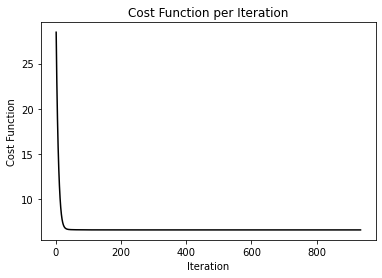

In [77]:
plt.plot(range(1, len(cost_function)), np.sqrt(cost_function[1:]), color="black")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title('Cost Function per Iteration')
plt.show()

In [78]:
y_pred, cost_function, error = feed_forward(X_test_scaled, y_test, W, b)

In [84]:
y_pred, cost_function, error

(array([12.30450821,  9.88490781, 21.46054449, 48.47068365, 31.8516783 ,
        37.67772502, 35.67544066, 40.82172825, 47.69817148, 40.19604017,
        44.89769996, 32.16128584, 40.35892637, 35.66646945, 44.11329222,
        46.51821197, 38.34971886, 44.36805351, 48.77095768, 45.30967298,
        42.22853293, 54.87710898, 47.93992588, 37.12382026, 33.51000503,
        48.38582879, 40.0972906 , 50.44672756, 47.14080118, 38.77269994,
        48.09395737, 40.34290245, 45.50207898, 43.9303906 , 46.41980165,
         7.80657603, 37.98703854, 40.01484847,  8.16198865, 56.04315621,
        31.388494  , 49.78526992, 24.3230691 , 47.88720265, 40.79589462,
        51.30072339, 41.81427552, 37.41099211, 44.0709967 , 35.88473248,
        47.50929924, 34.11635497, 43.48785576, 15.57174653, 38.00697902,
        48.76820765, 44.44589853, 44.7596015 , 45.20747012, 40.93276496,
        34.00670119, 44.09769204, 41.9128926 , 43.78674043, 53.82385495,
        44.12493736, 23.5658722 , 46.9679033 , 31.1

In [79]:
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred, 'Residuals':(y_test - y_pred)})

,Y_test,Y_pred,Residuals
176,19.2,12.304508,6.895492
347,11.2,9.884908,1.315092
307,24.7,21.460544,3.239456
299,46.1,48.470684,-2.370684
391,31.3,31.851678,-0.551678
...,...,...,...
65,44.3,43.943787,0.356213
48,13.4,11.670116,1.729884
18,42.3,47.367277,-5.067277
15,50.5,38.112267,12.387733


### MAE

In [80]:
MAE = metrics.mean_absolute_error(y_test, y_pred)

### MSE

In [81]:
MSE = metrics.mean_squared_error(y_test, y_pred)

### RMSE

In [82]:
RMSE = np.sqrt(MSE)

In [83]:
pd.DataFrame({'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE}, index=['Metrics'])

,MAE,MSE,RMSE
Metrics,5.195031,44.129009,6.642967


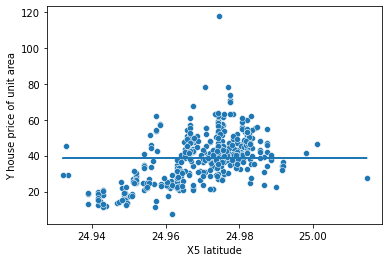

In [64]:
x = real_estate_df['X5 latitude']
y = W[5] * x + b
sns.scatterplot(data=real_estate_df, x='X5 latitude', y='Y house price of unit area')
plt.plot(x, y)

<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Filoger</p>
</div>